## 二分类

### Logistic Regression Example_2

https://mp.weixin.qq.com/s/cEbGM0_Lrt8elfubxSF9jg

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

%reload_ext watermark 
%watermark --iversion
pd.__version__

pandas    : None
seaborn   : 0.11.1
matplotlib: 3.3.2
numpy     : 1.19.2



'1.2.0'

In [7]:
df = pd.read_csv('../data/hearing_test.csv')
df.head()
df.shape

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


(5000, 3)

该数据集，对5000名参与者进行了一项实验，以研究年龄和身体健康对听力损失的影响，尤其是听高音的能力。此数据显示了研究结果对参与者进行了身体能力的评估和评分，然后必须进行音频测试（通过/不通过），以评估他们听到高频的能力。

    特征：1. 年龄 2. 健康得分
    标签：（1通过/0不通过）

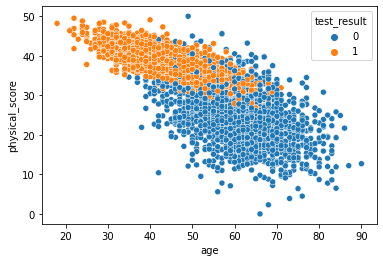

In [9]:
# 观察数据
sns.scatterplot(x='age', y='physical_score',hue='test_result',data=df);

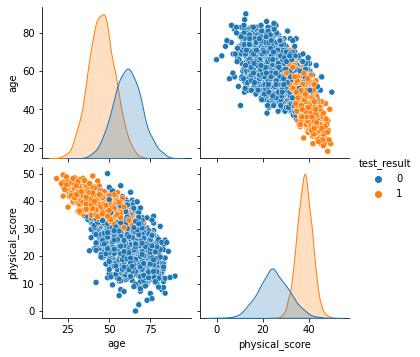

In [10]:
sns.pairplot(df,hue='test_result')

In [12]:
# train model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,plot_confusion_matrix

# prepare data
X = df.drop('test_result',axis=1)
y = df['test_result']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.1,random_state=50)
scalar = StandardScaler()
scaled_X_train = scalar.fit_transform(X_train)
scaled_X_test = scalar.transform(X_test)

# define model
log_model= LogisticRegression()

# train model
log_model.fit(scaled_X_train, y_train)

# predict model
y_pred = log_model.predict(scaled_X_test)

# score
accuracy_score(y_test,y_pred)

LogisticRegression()

0.922

### 模型性能评估：准确率、精确率、召回率

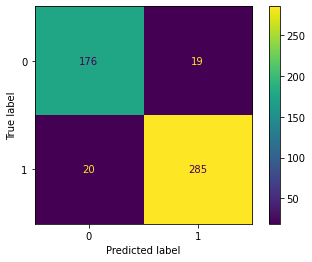

In [14]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)
#plot_confusion_matrix(log_model,scaled_X_test,y_test);

对以上矩阵的定义如下：
- TP (True Positive): 预测为正，实际结果为正。上图右下角285
- TN (True Negative): 预测为负，实际觉果为负。上图左上角176
- FP (False Positive): 预测为正，实际结果为负。上图右上角19
- FN (False Negative): 预测为负，实际结果为正。上图左下角20

**准确率（Accuracy）公式：**

$$ \mathit Accuracy = \frac{TP+TN}{TP+TN+FP+FN}  $$

本例中
$$ \mathit Accuracy = \frac{285+176}{285+176+20+19}= 0.922  $$


**精确度（Precision）公式：预测为正之中，有多少预测对了。**

$$ \mathit Precision = \frac{TP}{TP+FP} $$

本例中

$$ \mathit Precision = \frac{285}{285+19}=0.9375 $$


**召回率（Recall）公式：真实为正之中，有多少被正确预测出来了。**

$$ \mathit Recall = \frac{TP}{TP+FN} $$

本例中

$$ \mathit Recall = \frac{285}{285+20} = 0.934 $$

我们调用***classification_report*** 方法可验证结果

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       195
           1       0.94      0.93      0.94       305

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



## Softmax 多分类

Logistic回归和Softmax回归都是基于线性回归的分类模型，两者无本质区别，**都是从伯努利分布结合最大似然估计**。

**最大似然估计：** 利用已知的样本结果信息，反推最具有可能（最大概率）导致这些样本结果出现的模型参数值。

**Softmax回归模型**首先计算出每个类的分数，然后对这些分数应用**softmax函数**，估计每个类的概率。预测具有最高估计概率的类，就是找得分最高的类。


In [24]:
df = pd.read_csv('../data/iris.csv')
df.head()
df.shape

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


(150, 5)

该数据集，包含150个鸢尾花样本数据，数据特征包含花瓣的长度和宽度和萼片的长度和宽度，包含三个属种的鸢尾花，分别是山鸢尾(setosa)、变色鸢尾(versicolor)和维吉尼亚鸢尾(virginica)。

    特征：1. 花萼长度(sepal_length) 2. 花萼宽度 3. 花瓣长度(petal_length) 4 花瓣宽度
    标签：种类：山鸢尾(setosa)、变色鸢尾(versicolor)和维吉尼亚鸢尾(virginica)

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

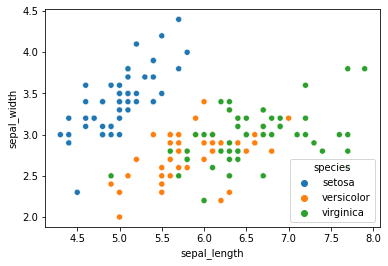

In [18]:
# observe data
sns.scatterplot(x='sepal_length',y = 'sepal_width',hue='species', data=df)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

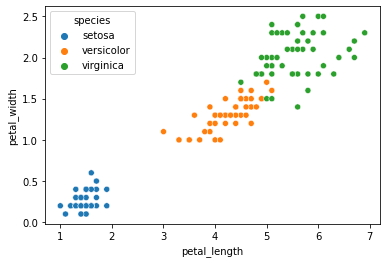

In [19]:
sns.scatterplot(x='petal_length',y = 'petal_width',hue='species', data=df)

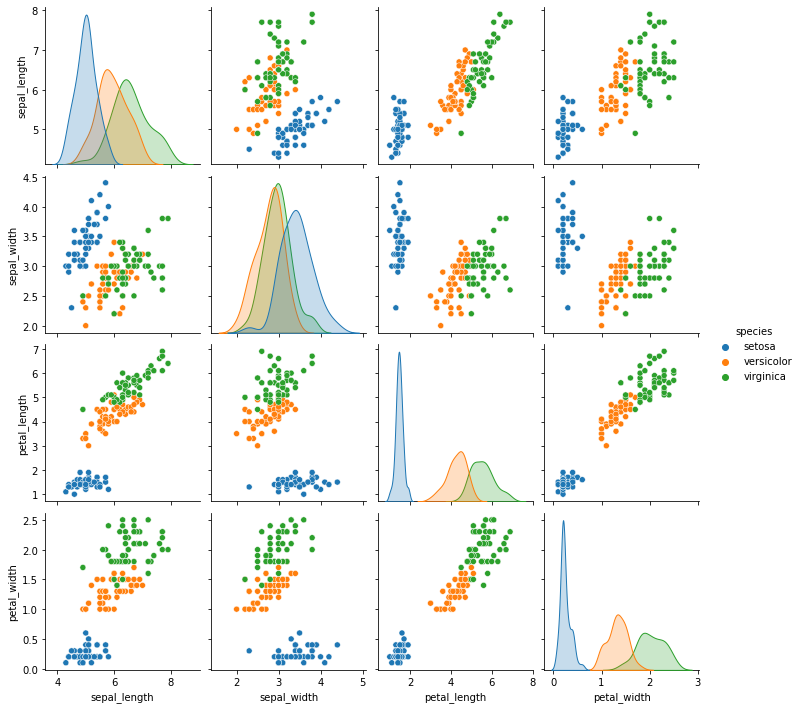

In [21]:
sns.pairplot(df, hue='species');

In [26]:
# prepare data
X = df.drop("species", axis=1)
y = df['species']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=50)
scalar = StandardScaler()
scaled_X_train = scalar.fit_transform(X_train)
scaled_X_test = scalar.transform(X_test)

# define model
softmax_model = LogisticRegression(multi_class='multinomial',solver="lbfgs",C = 1, random_state=50)

# train model
softmax_model.fit(scaled_X_train, y_train)

# predict data
y_pred = softmax_model.predict(scaled_X_test)

# score
accuracy_score(y_test,y_pred)

LogisticRegression(C=1, multi_class='multinomial', random_state=50)

1.0

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       1.00      1.00      1.00         4
   virginica       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



### 绘制花瓣分类

In [28]:
X = df[['petal_length','petal_width']].to_numpy()
y = df['species'].factorize(['setosa','versicolor','virginica'])[0]

In [34]:
type(X)
type(y)

numpy.ndarray

numpy.ndarray

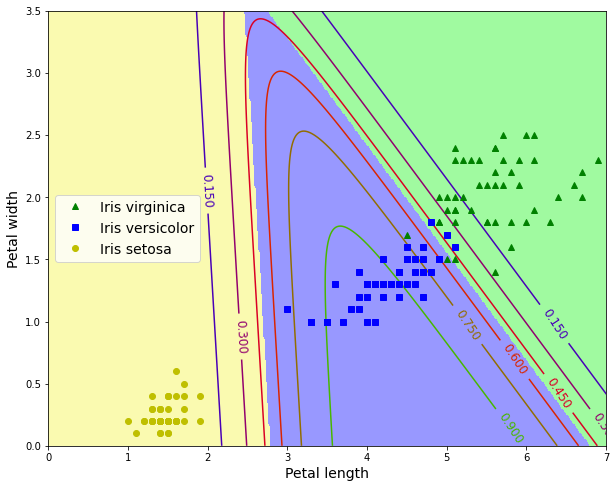

In [45]:
# define model
softmax_reg = LogisticRegression(multi_class='multinomial',solver="lbfgs",C = 1, random_state=50)

# train model
softmax_reg.fit(X,y)

# random test data
x0,x1 = np.meshgrid(
    np.linspace(0,8,500).reshape(-1,1),
    np.linspace(0,3.5,200).reshape(-1,1),
)
X_new = np.c_[x0.ravel(),x1.ravel()]

# predict
y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

# draw a pic
zz1 = y_proba[:,1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 8))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show();